In [80]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('BlackFriday.csv')

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [10]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [12]:
del df['Product_Category_2']
del df['Product_Category_3']

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [16]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


In [18]:
data = pd.DataFrame({'Ratio': [len(df[df['Gender']== 'M']),len(df[df['Gender']== 'F'])]}, index = ['Male','Female'])

In [20]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

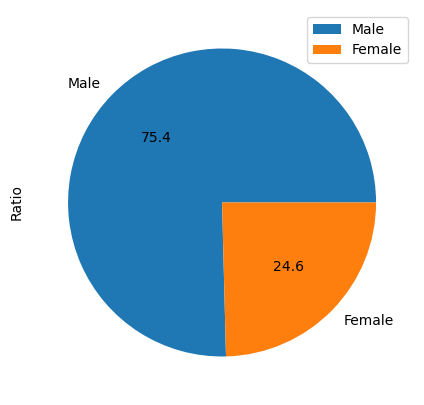

In [22]:
data.plot.pie(y = "Ratio", figsize =(5,5), autopct= '%.1f')

In [24]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

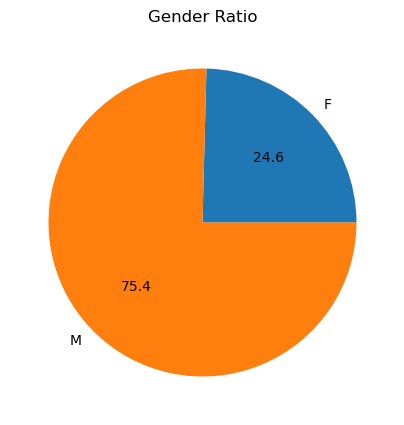

In [26]:
df.groupby('Gender').size().plot(kind='pie', 
                                 autopct="%.1f",
                                 title = 'Gender Ratio', 
                                 figsize = (5,5))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

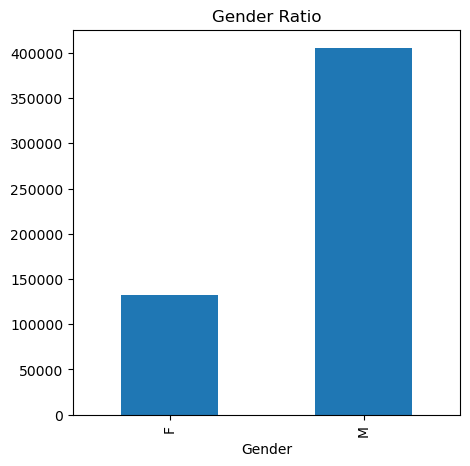

In [28]:
df.groupby('Gender').size().plot(kind='bar', 
                                 title = 'Gender Ratio', 
                                 figsize = (5,5))

In [34]:
df.groupby('Gender')['Purchase'].sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: ylabel='Purchase'>

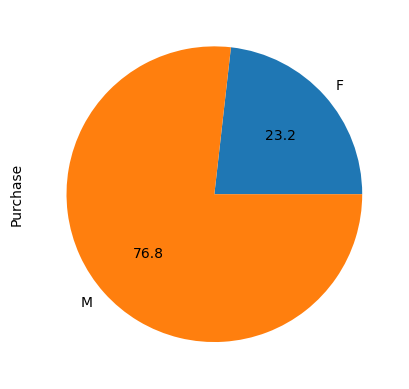

In [36]:
df.groupby('Gender')['Purchase'].sum().plot(kind = "pie", autopct = "%.1f")

<Axes: ylabel='Purchase'>

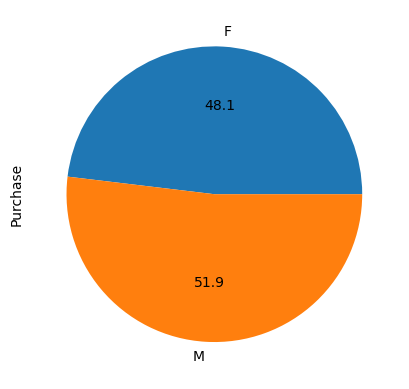

In [42]:
df.groupby('Gender')['Purchase'].mean().plot(kind = "pie", autopct = "%.1f")

<Axes: xlabel='Gender'>

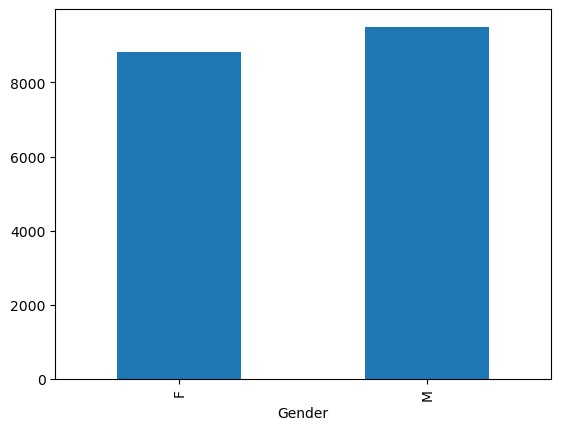

In [46]:
df.groupby('Gender')['Purchase'].mean().plot(kind = "bar")

In [48]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

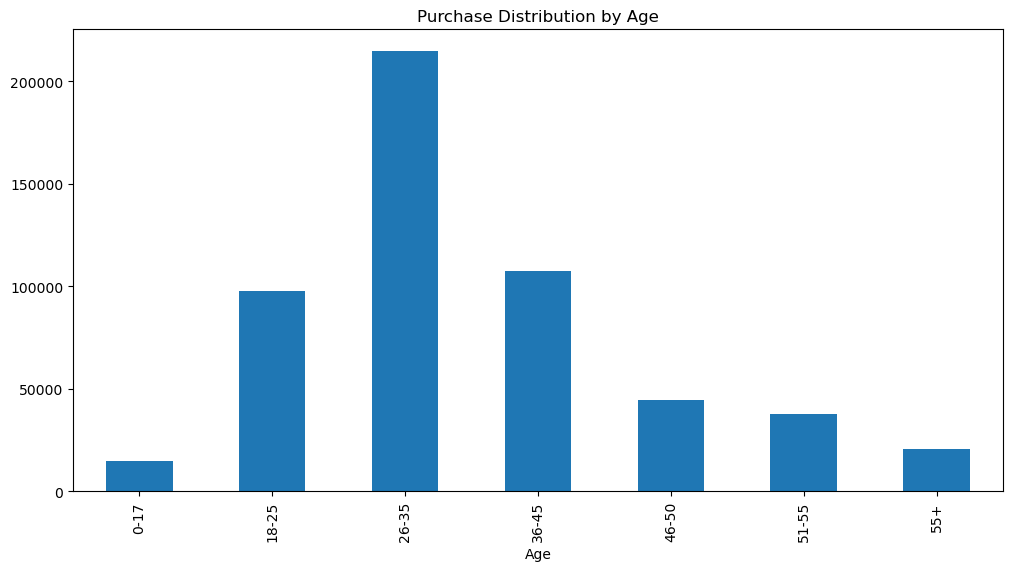

In [52]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6), title = 'Purchase Distribution by Age')

In [58]:
for i in df['Age'].unique():
    print (i,':',df[df['Age']==i]["Product_ID"].nunique())

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


In [70]:
lst =[]
for i in df['Age'].unique():
    lst.append([i, df[df['Age']==i]["Product_ID"].nunique()])
data = pd.DataFrame(lst , columns = ['Age','Products'])
    

In [72]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

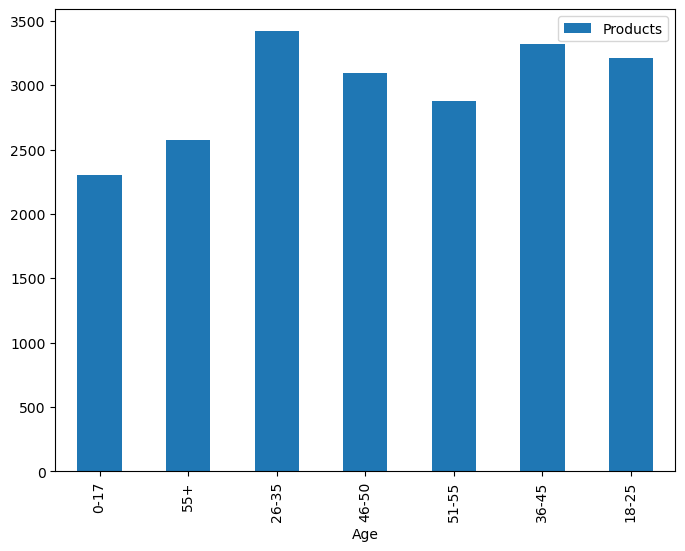

In [78]:
data.plot.bar(x= 'Age', figsize = (8,6))

<Axes: xlabel='Age', ylabel='count'>

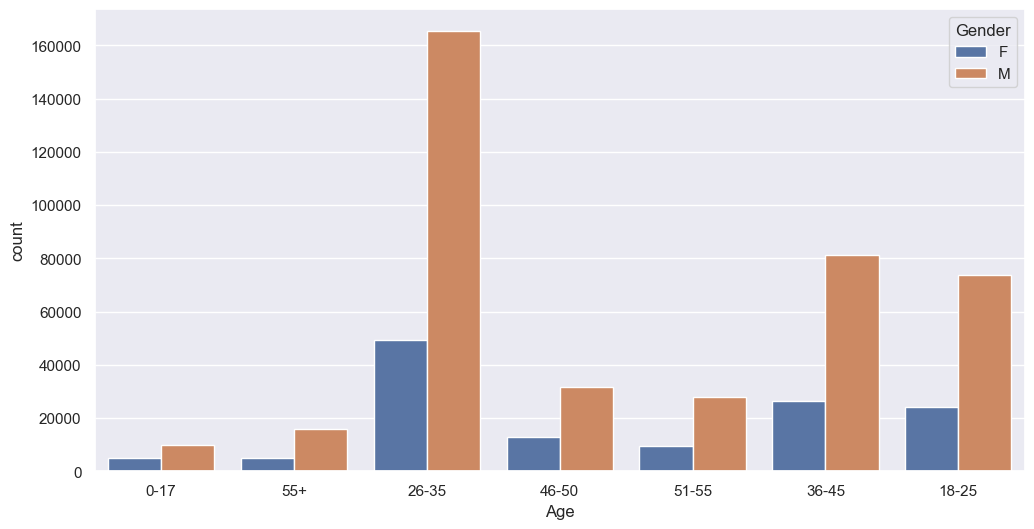

In [84]:
sns.set(rc = {'figure.figsize' :(12,6) })
sns.countplot(x='Age',hue="Gender", data= df)

<Axes: xlabel='City_Category', ylabel='count'>

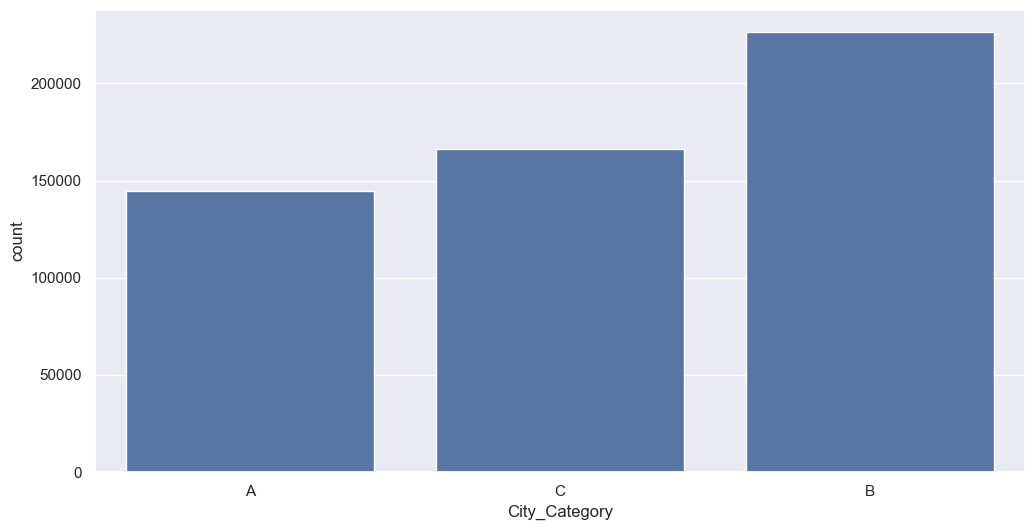

In [86]:
sns.countplot(x= df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

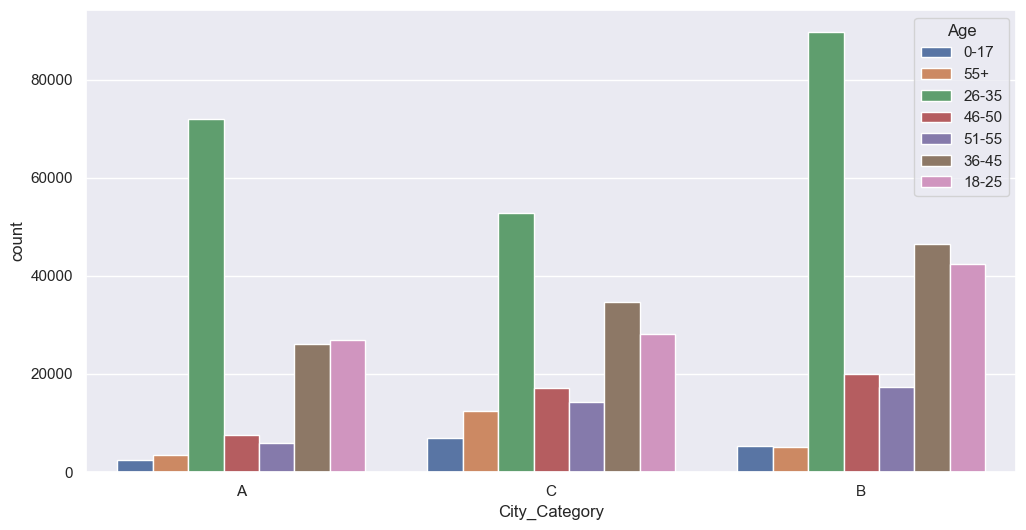

In [88]:
 sns.countplot(x='City_Category', hue= 'Age', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

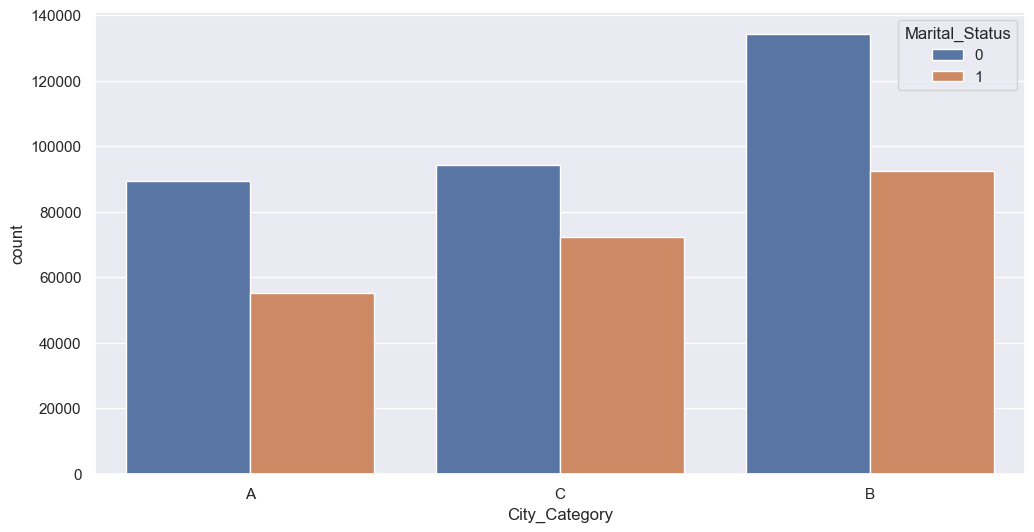

In [96]:
sns.countplot(x='City_Category', hue= 'Marital_Status', data = df)

<Axes: ylabel='Purchase'>

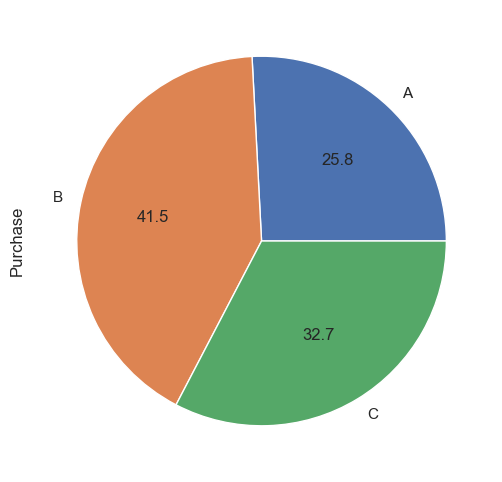

In [104]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie', autopct='%.1f')

<Axes: ylabel='Purchase'>

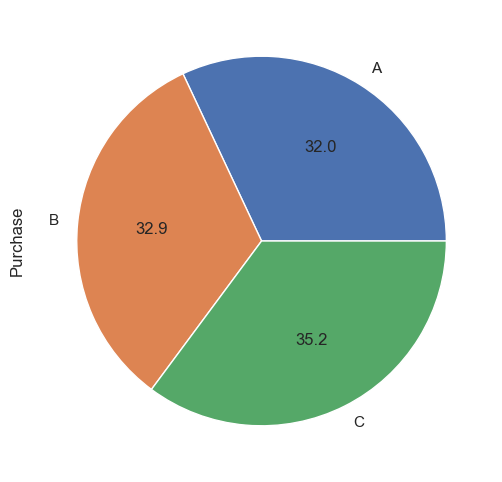

In [106]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie', autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

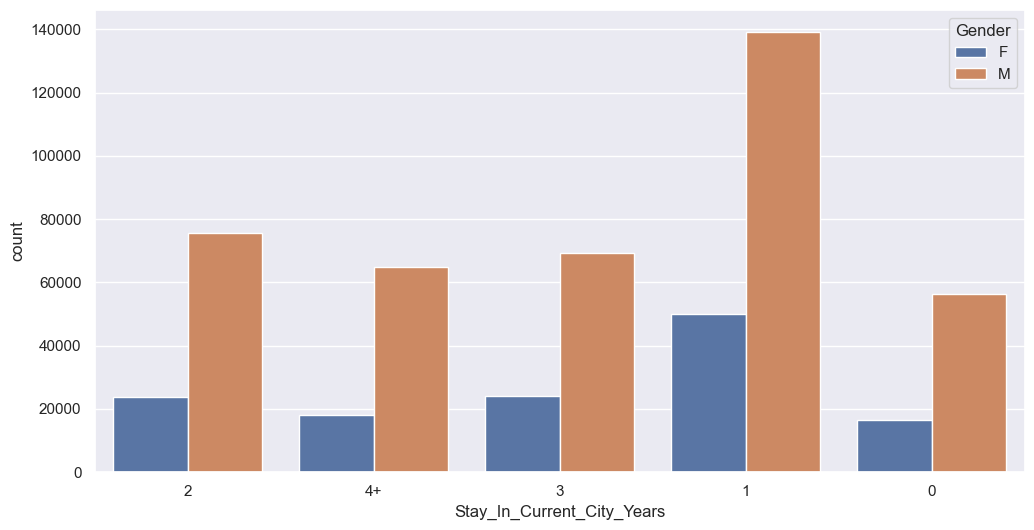

In [112]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Gender", data =df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

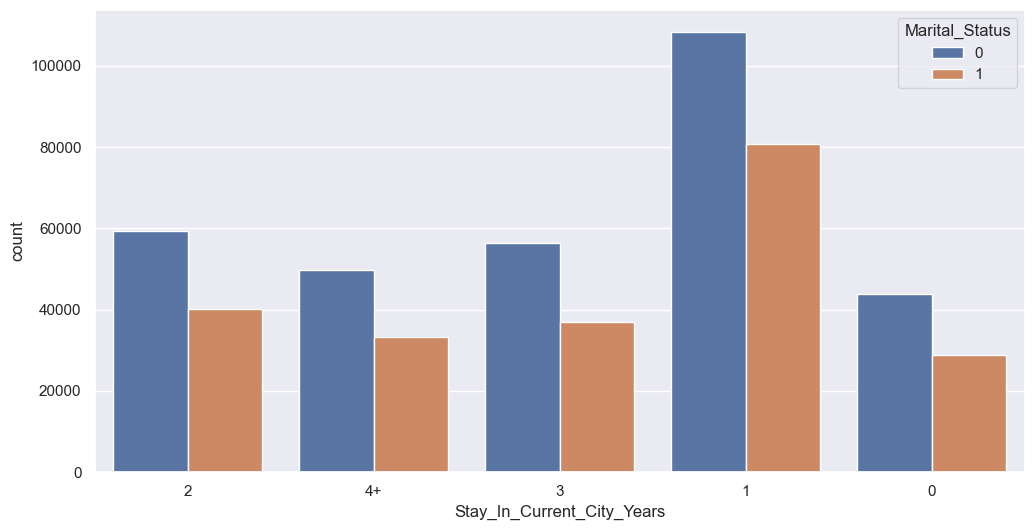

In [116]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Marital_Status", data =df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

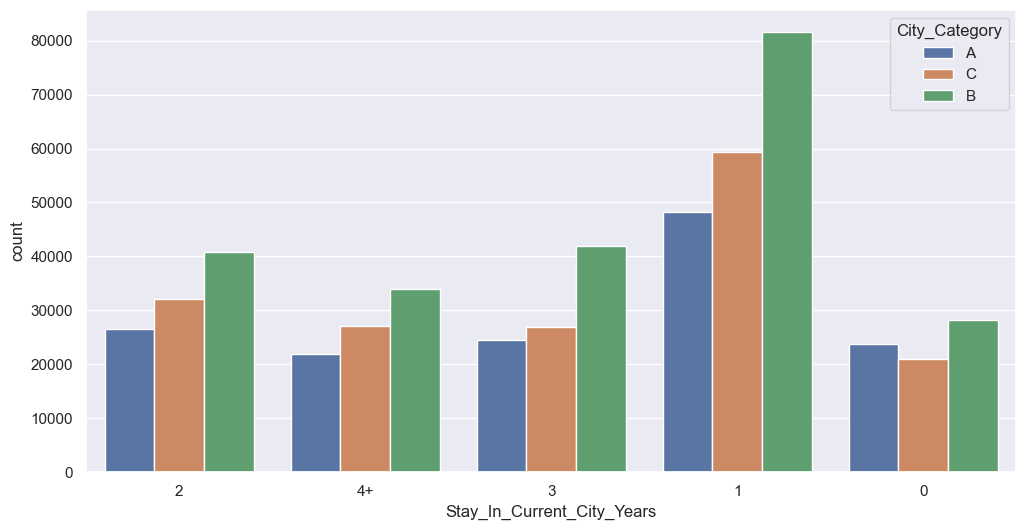

In [118]:
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category", data =df)

<Axes: xlabel='Occupation', ylabel='count'>

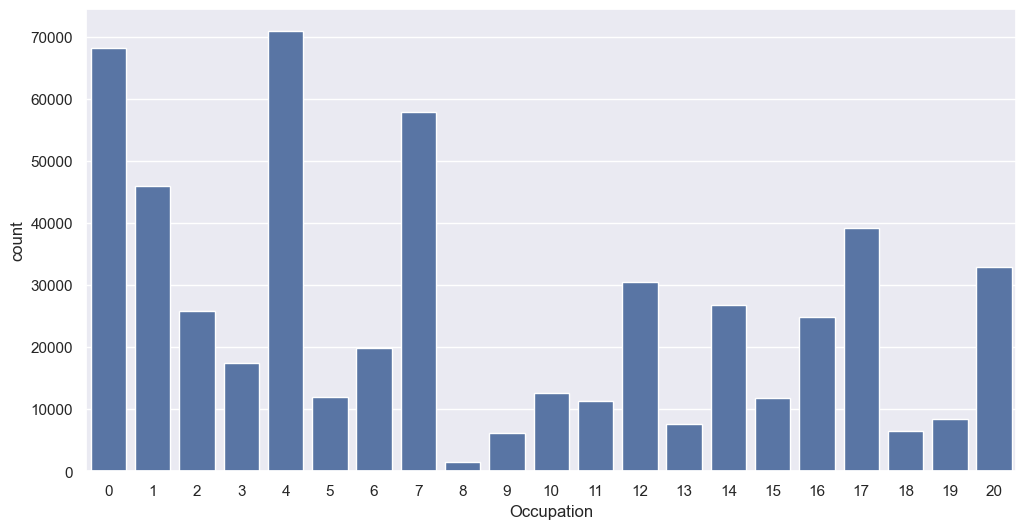

In [122]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

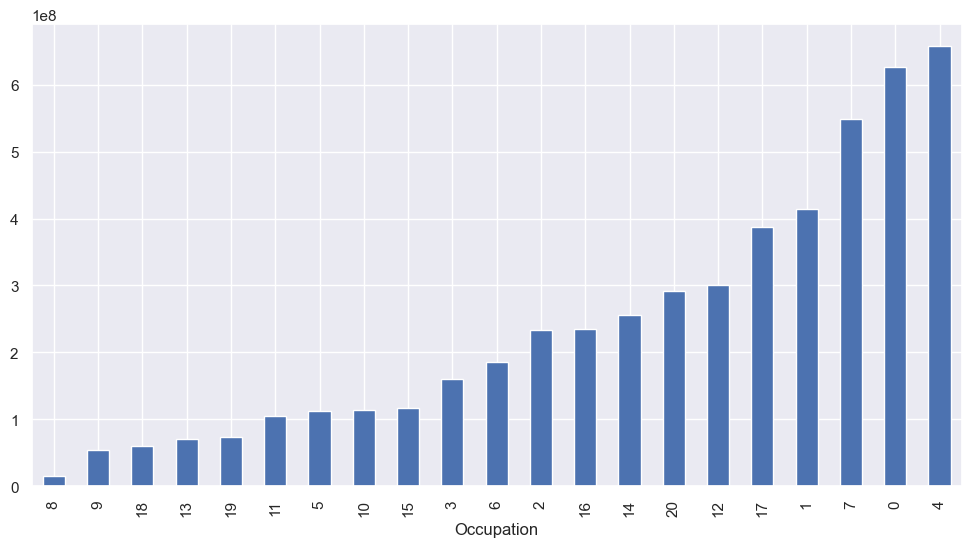

In [128]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

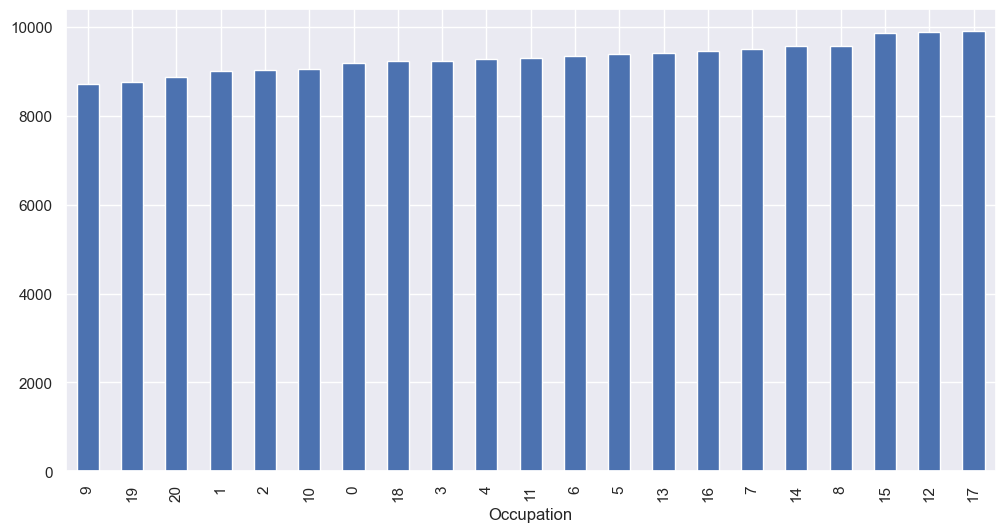

In [132]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

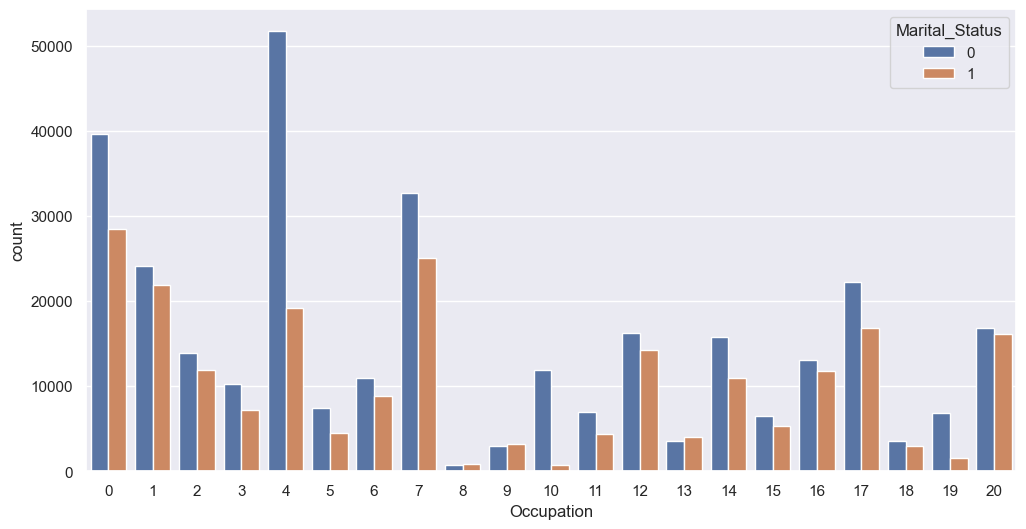

In [134]:
sns.countplot(x="Occupation", hue='Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

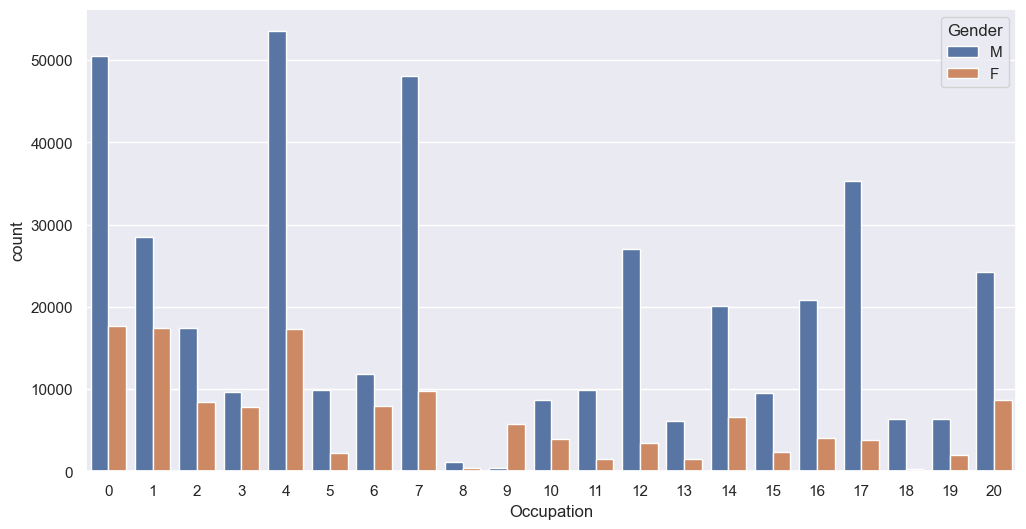

In [138]:
sns.countplot(x="Occupation", hue='Gender', data = df)

In [144]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i] +""+ str(df["Marital_Status"][i]))

df["MaritalGender"]=l

In [148]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M0


<Axes: xlabel='MaritalGender', ylabel='count'>

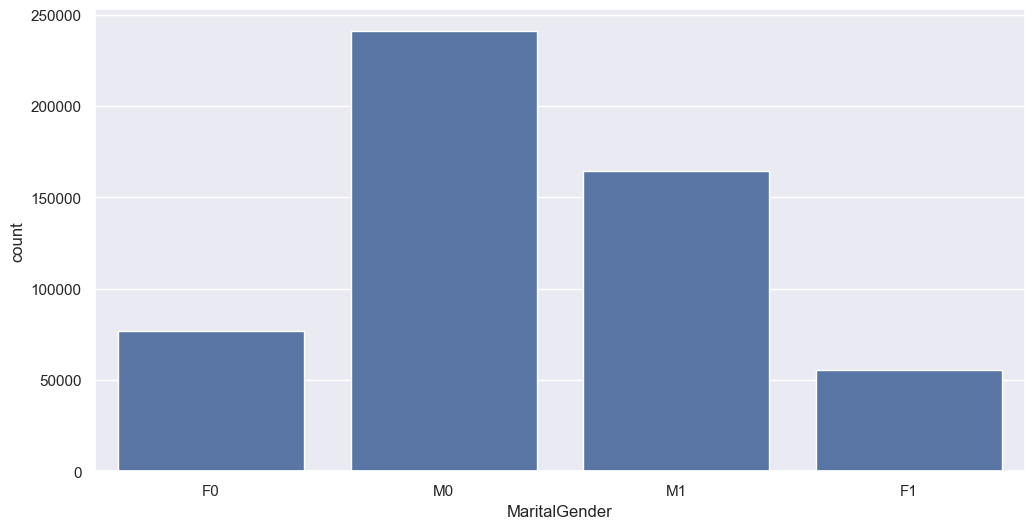

In [150]:
sns.countplot(x=df['MaritalGender'])